In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb

In [2]:
taille_voc = 10000
stop_words = 0
taille_critique = 256
taille_dense = 16
epoch = 30
batch_size = 512

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=taille_voc, skip_top=stop_words)

In [4]:
index_mot = imdb.get_word_index()

In [5]:
index_mot = {w: (i + 3) for w, i in index_mot.items()}

In [6]:
index_mot.update({"<pad>": 0, "<start>": 1, "<unk>": 2, '<undef>': 3})

In [7]:
mot_index = dict((i, mot) for mot, i in index_mot.items())

In [8]:
for i in range(20):
    print(f'{mot_index[i+4]} => {i+4}')

the => 4
and => 5
a => 6
of => 7
to => 8
is => 9
br => 10
in => 11
it => 12
i => 13
this => 14
that => 15
was => 16
as => 17
for => 18
with => 19
movie => 20
but => 21
film => 22
on => 23


In [9]:
np.std([len(phrase) for phrase in x_train])

np.float64(176.49367364852034)

<Axes: ylabel='Count'>

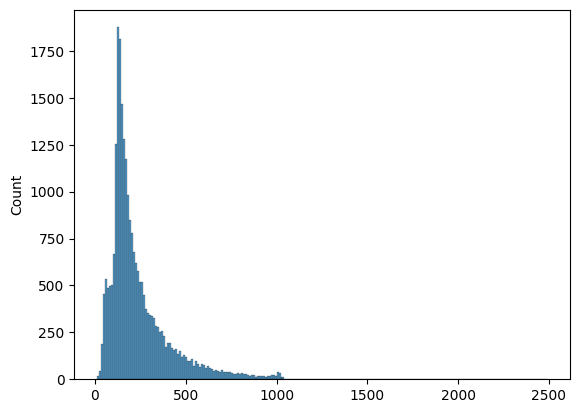

In [10]:
taille = [len(phrase) for phrase in x_train]
sns.histplot(taille)

In [11]:
" ".join([mot_index[i] for i in x_train[0]])

"<start> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <unk> is an amazing actor and now the same being director <unk> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <unk> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <unk> to the two little boy's that played the <unk> of norman and paul they were just brilliant children are often left out of the <unk> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [12]:
y_train = np.array(y_train).astype("float32")
y_test = np.array(y_test).astype("float32")


In [13]:
x_train = pad_sequences(x_train, value=0, maxlen=taille_critique, padding='post')
x_test = pad_sequences(x_test, value=0, maxlen=taille_critique, padding='post')

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(taille_critique,)))
model.add(tf.keras.layers.Embedding(input_dim=taille_voc, output_dim=16))
model.add(tf.keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(36, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 256, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 36)             │           612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            37 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,761 (635.79 KB)

 Trainable params: 162,761 (635.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.2)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.5112 - loss: 0.6924 - val_accuracy: 0.5258 - val_loss: 0.6909
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.5584 - loss: 0.6839 - val_accuracy: 0.5154 - val_loss: 0.6931
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.5334 - loss: 0.6883 - val_accuracy: 0.5518 - val_loss: 0.6819
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.5587 - loss: 0.6699 - val_accuracy: 0.5592 - val_loss: 0.6644
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.5956 - loss: 0.6432 - val_accuracy: 0.5582 - val_loss: 0.6603
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.6087 - loss: 0.6241 - val_accuracy: 0.5752 - val_loss: 0.6587
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.6104 - loss: 0.6067 - val_accuracy: 0.5804 - val_loss: 0.6479
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.6151 - loss: 0.5944 - val_accuracy: 0.

<Axes: >

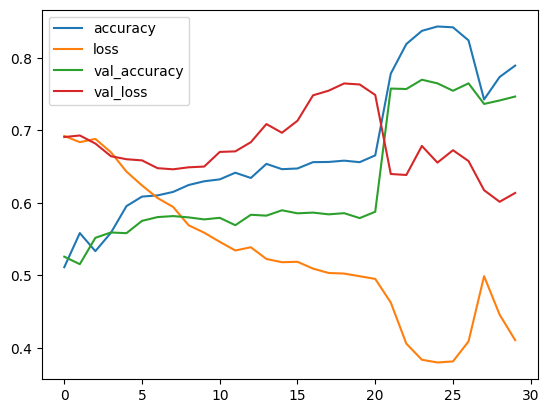

In [18]:
pd.DataFrame(history.history).plot()

In [19]:
y_pred = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


In [20]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

<Axes: >

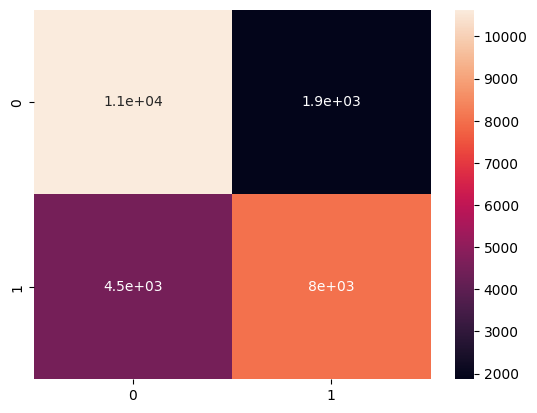

In [21]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)